In [2]:
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

# Text processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Ensemble algorithm
from sklearn.ensemble import RandomForestClassifier

<h3>Load data</h3>

In [3]:
path_data = '../../../yelp_academic_dataset_review.pickle'
data = pd.read_pickle(path_data)

In [4]:
# Removing all ('\n') characters using list comprehensions
data['text'] = [txt.replace('\n', '') for txt in data['text']]

# Taking only text and stars columns
data = data.loc[:, ['text', 'stars']]

<h3>Tokenizer</h3>

In [5]:
#data["tokens"] = data.apply(lambda row: word_tokenize(row["text"]), axis=1)

#data.head()

<h3>Text representation</h3>

The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

In [6]:
X = data["text"].tolist()
y = data["stars"].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def count_vectorize(data):
    count_vectorizer = CountVectorizer()
    
    embedding = count_vectorizer.fit_transform(data)
    
    return embedding, count_vectorizer

def tfidf_transform(data):
    tfidf_transformer = TfidfTransformer()
    
    text_freq = tfidf_transformer.fit_transform(data)
    
    return text_freq, tfidf_transformer

X_train_counts, count_vectorizer = count_vectorize(X_train)
X_test_counts = count_vectorizer.transform(X_test)

X_train_tfidf, tfidf_transformer = tfidf_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

<h3>Tuning parameters</h3>

In [8]:
#n_trees = [50, 100, 150, 200, 250, 300, 350, 400]
n_trees=[50,100,150,200,250]
accuracy_means = []
accuracy_stdevs=[]
num_folds=5
seed=42

#temporary only a part of the data
X_train_tfidf_t=X_train_tfidf[:10000]
y_train_t=y_train[:10000]

for n_tree in n_trees:
    model = RandomForestClassifier(n_estimators=n_tree, random_state=42, n_jobs=-1)
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_tfidf_t, y_train_t, scoring='accuracy', cv=kfold)
    accuracy_means.append(cv_results.mean())
    accuracy_stdevs.append(cv_results.std())
    
for accuracy_mean, accuracy_stdev, n_tree in zip(accuracy_means, accuracy_stdevs, n_trees):
    print("%f (%f) with n_trees : %r" % (accuracy_mean, accuracy_stdev, n_tree))

0.432000 (0.006701) with n_trees : 50
0.441600 (0.007838) with n_trees : 100
0.437100 (0.007800) with n_trees : 150
0.441900 (0.007405) with n_trees : 200
0.439200 (0.007201) with n_trees : 250


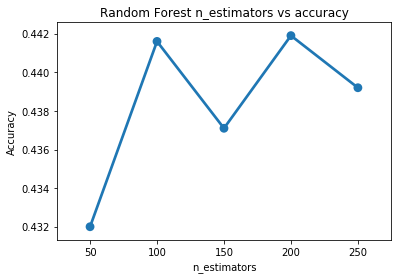

In [16]:
sns.pointplot(x=n_trees, y=accuracy_means)
plt.title("Random Forest n_estimators vs accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.savefig("RandomForest10000")

In [12]:
best_n_tree=n_trees[0]
best_acc=accuracy_means[0]
for i in range(len(n_trees)):
    if accuracy_means[i]>best_acc:
        best_acc=accuracy_means[i]
        best_n_tree=n_trees[i]

<h3>Testing data</h3>

In [13]:
RF_clf=RandomForestClassifier(n_estimators=n_tree, random_state=42, n_jobs=-1).fit(X_train_tfidf_t,y_train_t)


In [15]:
X_test_tfidf_t=X_test_tfidf[:2500]
y_test_t=y_test[:2500]
RF_clf.score(X_test_tfidf,y_test)

0.4486017339327647